1. breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
1. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

---

1. MINIST digit 이미지 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
1. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.
    - 42번 픽셀

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X.shape, y.shape

((1797, 64), (1797,))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import *

cv = KFold(5)

for i in range(5,15):
    tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=i).fit(X, y)
    print("{}".format(i), cross_val_score(tree1, X, y, scoring="accuracy", cv=cv).mean())

5 0.7390544722995976
6 0.7763215722686475
7 0.8046997833488085
8 0.7929990714948932
9 0.7996812132466729
10 0.8130346641906531
11 0.8041411327762302
12 0.8074760136180748
13 0.8052584339213865
14 0.7996734757041164


In [4]:
%matplotlib inline
import io
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO() 
    export_graphviz(model, out_file=dot_buf)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0] 
    image = graph.create_png()
    return Image(image)

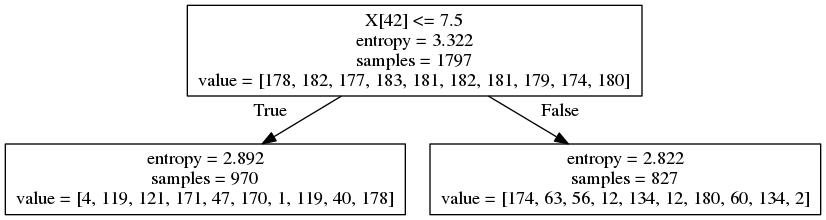

In [8]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1).fit(X, y)
draw_decision_tree(tree)

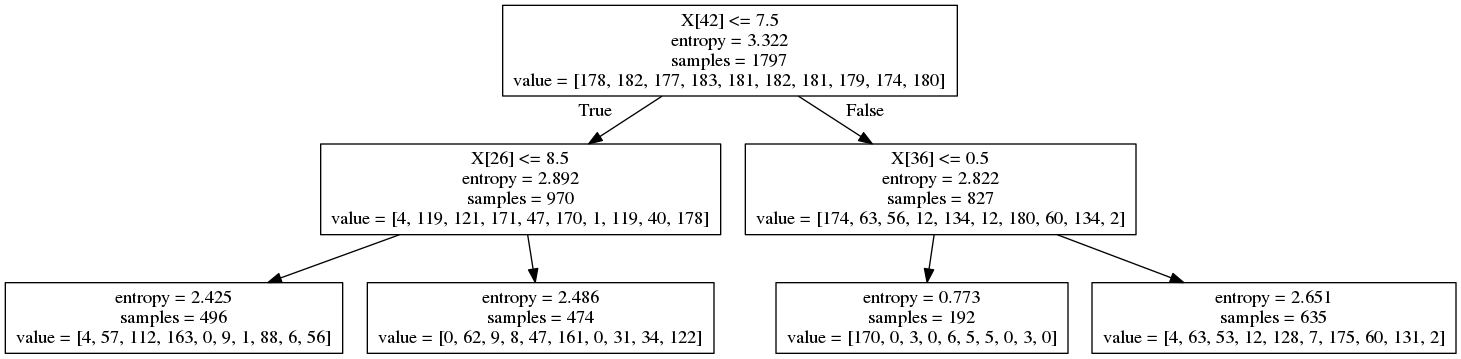

In [9]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X, y)
draw_decision_tree(tree)

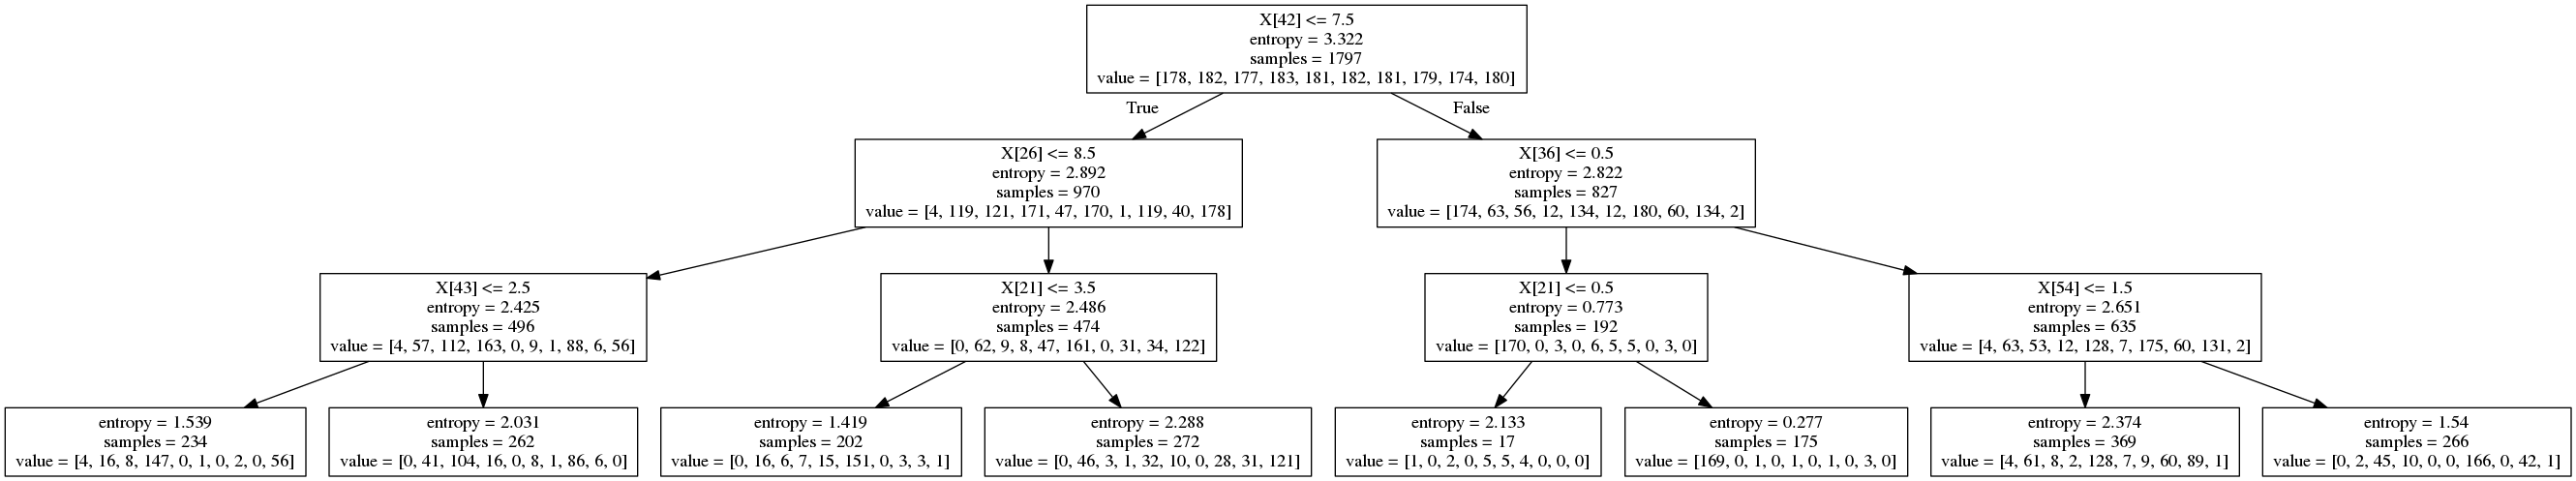

In [10]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X, y)
draw_decision_tree(tree)